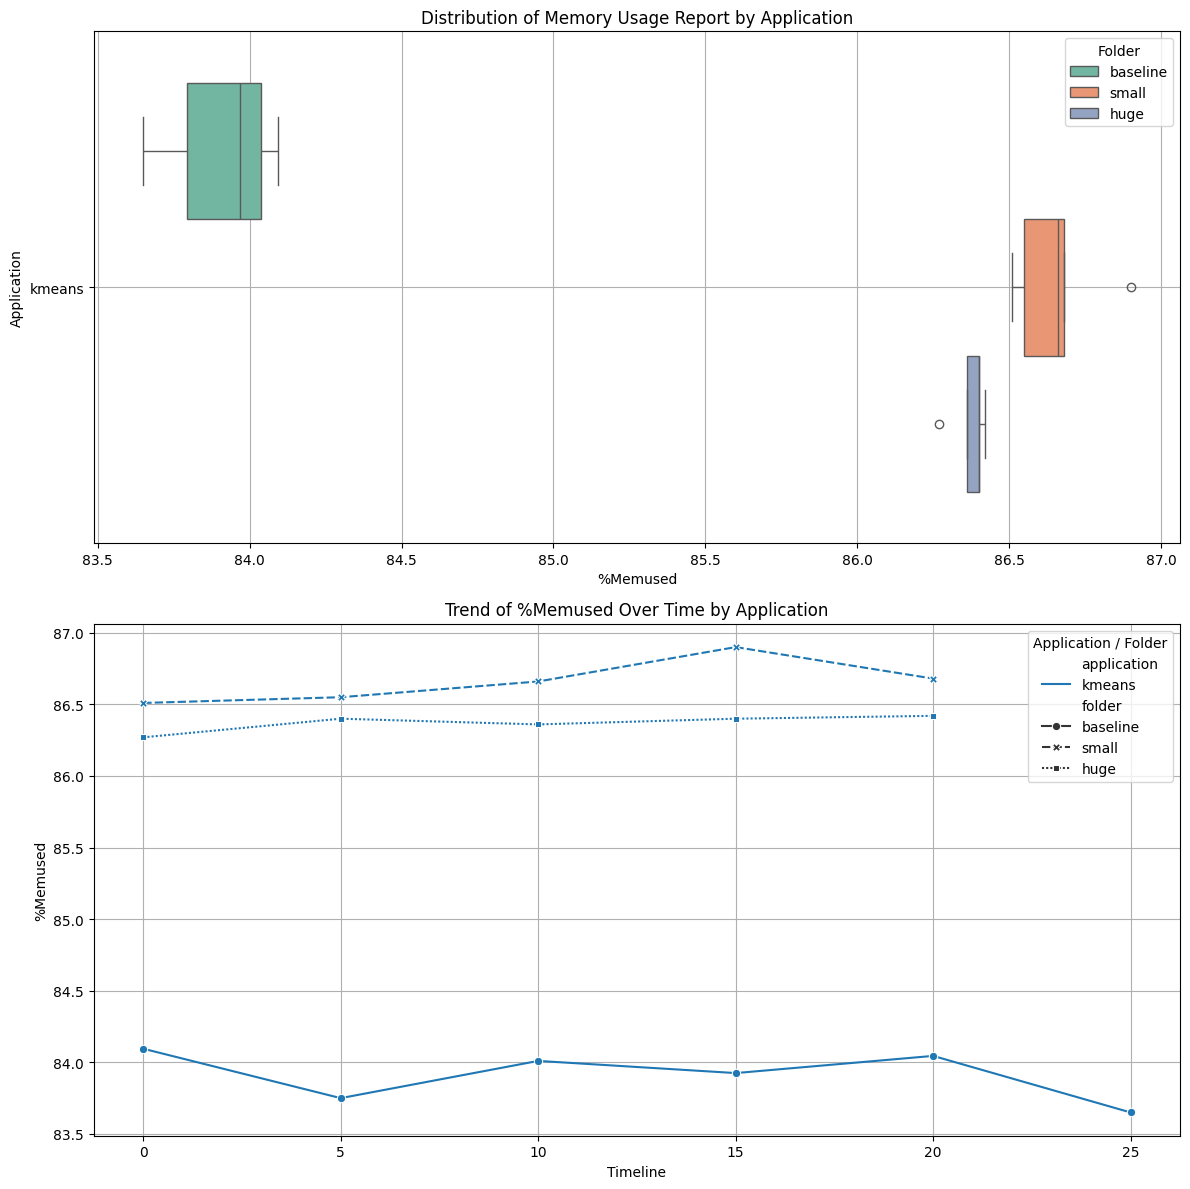

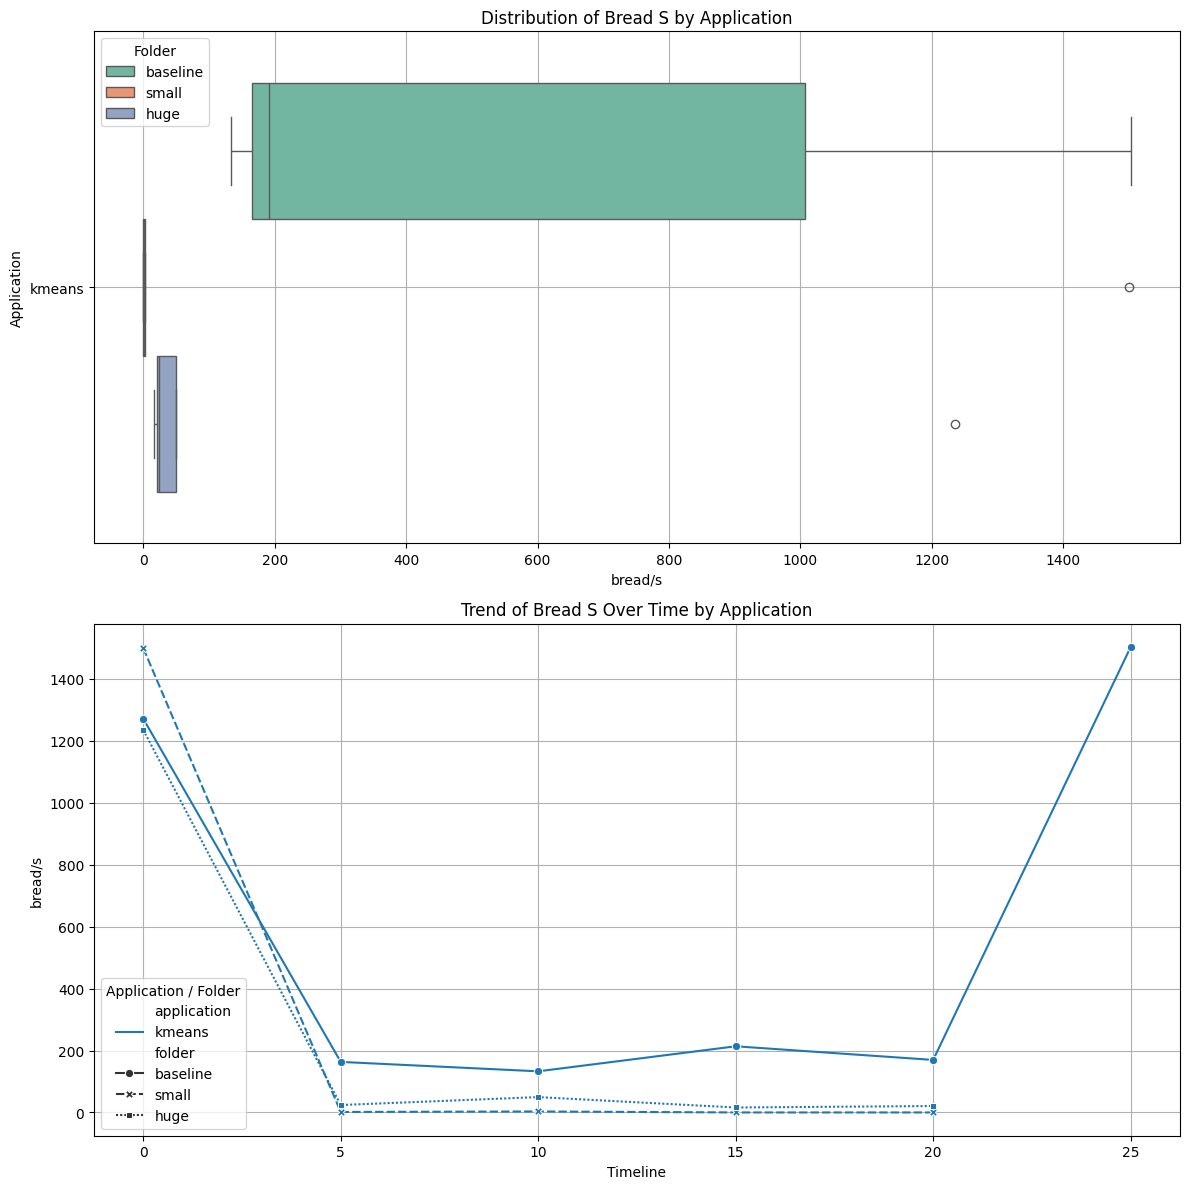

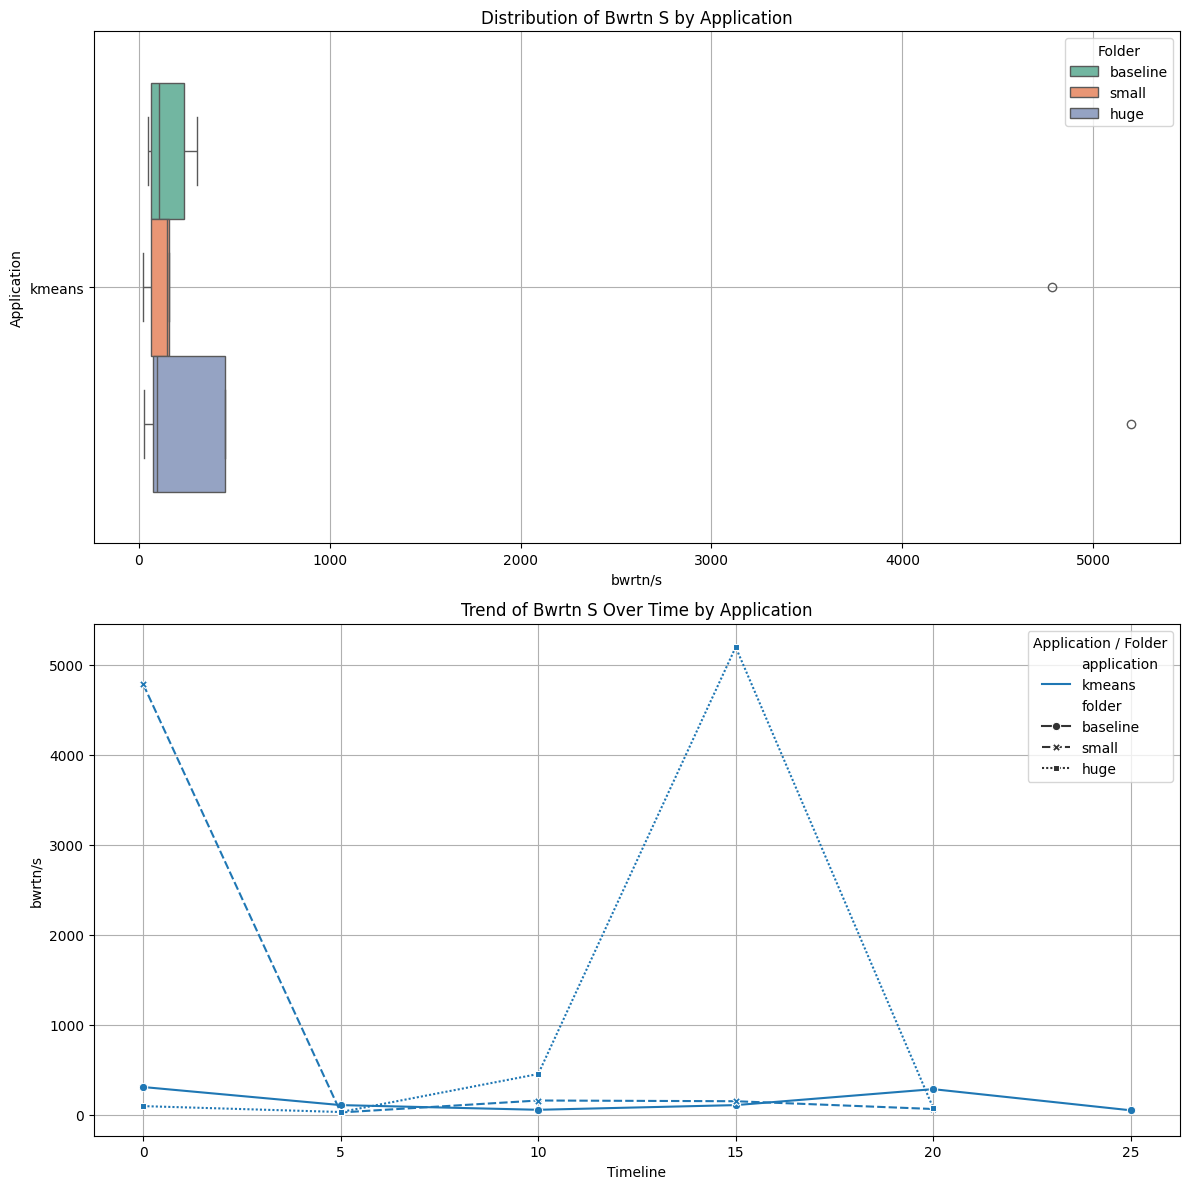

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# terrasort <- cpu
# dfsio <- memory, I/0
# pagerank <- network

# List of applications you want to plot (if you want to filter)
applications_to_plot = [
    # 'terasort',
    # 'dfsioe',
    # 'pagerank',
    'kmeans'
]  # Empty list to plot all applications


# experiment folders
folders = ['baseline', 'small', 'huge']
output_base_dir = os.path.join(os.path.dirname(os.getcwd()), 'median')

# Define the metrics we want to process
metrics = {
    # 'cpu_usage_report_combined_median.csv': '%cpu_utilization',
    'memory_usage_report_combined_median.csv': '%memused',
    'io_usage_report_combined_median.csv': ['bread/s', 'bwrtn/s'],
    # 'network_usage_report_combined_median.csv': ['rxkB/s', 'txkB/s']
}

# Function to plot data
def plot_data(df, metric, report, applications=None):
    if applications:
        df = df[df['application'].isin(applications)]
    
    if isinstance(metric, list):
        for m in metric:
            plt.figure(figsize=(12, 12))
            
            # Box plot
            plt.subplot(2, 1, 1)
            sns.boxplot(data=df, y='application', x=m, hue='folder', palette="Set2", orient='h')
            plt.xlabel(m)
            plt.title(f'Distribution of {m.replace("/", " ").title()} by Application')
            plt.ylabel('Application')
            plt.legend(title='Folder')
            plt.grid(True)
            
            # Line plot
            plt.subplot(2, 1, 2)
            sns.lineplot(data=df, x='timeline', y=m, hue='application', style='folder', markers=True)
            plt.ylabel(m)
            plt.title(f'Trend of {m.replace("/", " ").title()} Over Time by Application')
            plt.xlabel('Timeline')
            plt.legend(title='Application / Folder')
            plt.grid(True)
            
            plt.tight_layout()
            plt.show()
    else:
        plt.figure(figsize=(12, 12))
        
        # Box plot
        plt.subplot(2, 1, 1)
        sns.boxplot(data=df, y='application', x=metric, hue='folder', palette="Set2", orient='h')
        plt.xlabel(metric.replace('_', ' ').title())
        plt.title(f'Distribution of {report.replace("_combined_median.csv", "").replace("_", " ").title()} by Application')
        plt.ylabel('Application')
        plt.legend(title='Folder')
        plt.grid(True)
        
        # Line plot
        plt.subplot(2, 1, 2)
        sns.lineplot(data=df, x='timeline', y=metric, hue='application', style='folder', markers=True)
        plt.ylabel(metric.replace('_', ' ').title())
        plt.title(f"Trend of {metric.replace('_', ' ').title()} Over Time by Application")
        plt.xlabel('Timeline')
        plt.legend(title='Application / Folder')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Combine data from all specified folders
combined_dfs = {report: pd.DataFrame() for report in metrics.keys()}

for folder in folders:
    folder_path = os.path.join(output_base_dir, folder)
    for report, metric in metrics.items():
        file_path = os.path.join(folder_path, report)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, sep=';')
            df['folder'] = folder  # Add a column to identify the folder
            combined_dfs[report] = pd.concat([combined_dfs[report], df], ignore_index=True)

# Plot combined data for each application
for application in applications_to_plot:
    for report, metric in metrics.items():
        if not combined_dfs[report].empty:
            app_df = combined_dfs[report][combined_dfs[report]['application'] == application]
            plot_data(app_df, metric, report, applications=[application])
